# What are your chances to survive Titaninc Disaster



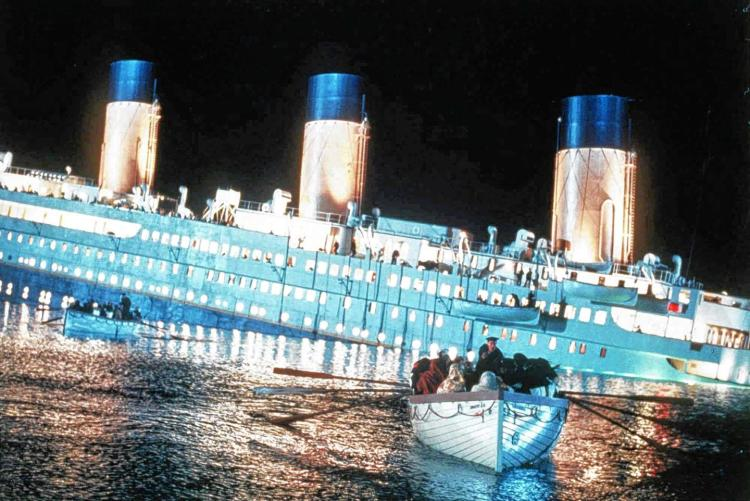

In [29]:
from IPython.display import Image
Image("http://assets.nydailynews.com/polopoly_fs/1.1057617.1333748255!/img/httpImage/image.jpg_gen/derivatives/article_750/pop8n-2-web.jpg",height=500,width=500)



# Importing Tools

In [2]:
#Data Analysis
import pandas as pd
import numpy as np

#Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


#Other
from IPython.display import display


In [50]:
#Importing DATA
#There are 2 datasets
df_test= pd.read_csv("test.csv")
df_train= pd.read_csv("train.csv")

#combining both the data 
df= pd.concat([df_test, df_train])


# Data Analysis by Numbers

In [4]:
df_train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [158]:
display(df.describe())
display(df.info())

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 890
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


None


Categorical: Nominal,Ordinal,Discrete
Numerical: Discrete, Contnous

Analysis
Categorical: Survived, Sex, Embarked
Oridinal: Pclass
Continous: Age, Fare
Discrete: SibSp, Parch


# Data Analysis with Graphs

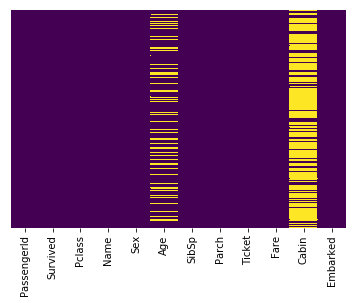

In [24]:
#MIssing Datab
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

-> Around 20% of the Age Data is missing which could be replaced with some form of imputation


-> Roughly 90% od cabin data is missing which means it could either be dropped or make another feature like "Cabin Known: 1 or 0"

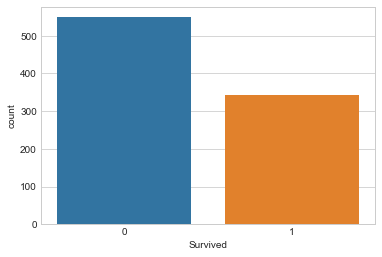

In [28]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data= df_train)

,Survived
Sex,
male,0.188908
female,0.742038


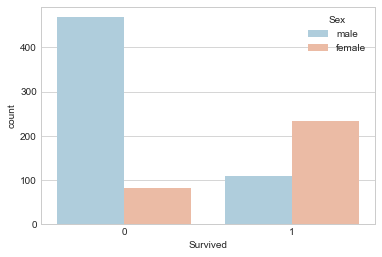

In [80]:
df_train[['Sex','Survived']].groupby(['Sex'], as_index=True).mean().sort_values(by= 'Survived')

plt.figure()
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=df_train,palette='RdBu_r')
df_train[['Sex','Survived']].groupby(['Sex'], as_index=True).mean().sort_values(by= 'Survived')


,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


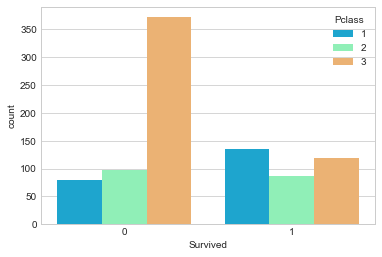

In [61]:


plt.figure()
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df_train,palette='rainbow')

df_train[['Pclass', 'Survived']].groupby(['Pclass']).mean().sort_values(by='Survived', ascending=False)

In [62]:
pd.crosstab(df_train.Pclass,df_train.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


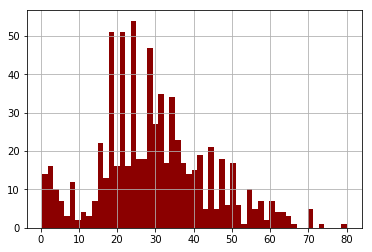

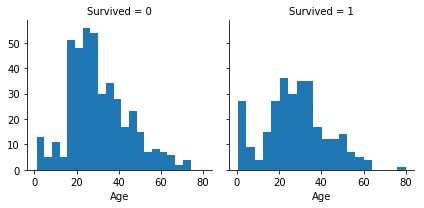

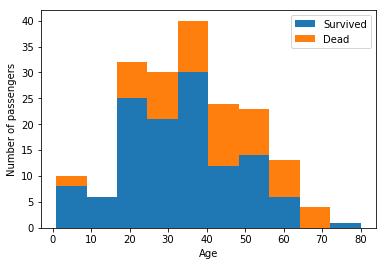

In [18]:
df_train['Age'].hist(bins=55,color='darkred')

# plt.figure()
# figure = plt.figure(figsize=(13,8))
# plt.hist([df_train[df_train['Survived']==1]['Age'],df_train[df_train['Survived']==0]['Age']], stacked=True, color = ['g','r'],
#          bins = 30,label = ['Survived','Dead'])
# plt.xlabel('Age')
# plt.ylabel('Number of passengers')
# plt.legend()

plt.figure()
g = sns.FacetGrid(df_train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

plt.figure()
plt.hist([df_train.dropna()[df_train.dropna()['Survived']==1]['Age'],df_train.dropna()[df_train.dropna()['Survived']==0]['Age']], stacked=True, label = ['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend()

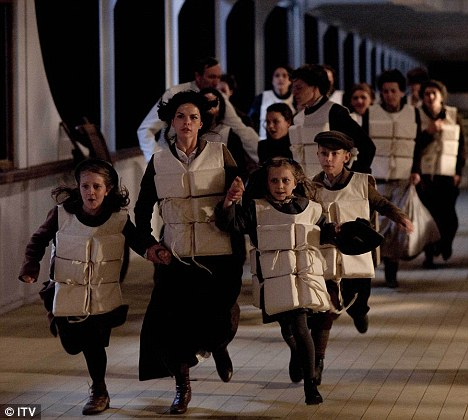

In [31]:
from IPython.display import Image
Image("http://cdn.playbuzz.com/cdn/30905c83-3f05-4f15-8a8c-7c9d5a783544/e28ea73a-a6c9-41e3-8529-43dfcce40292.jpg")



--> It seems Women and Children have the high chance of survival

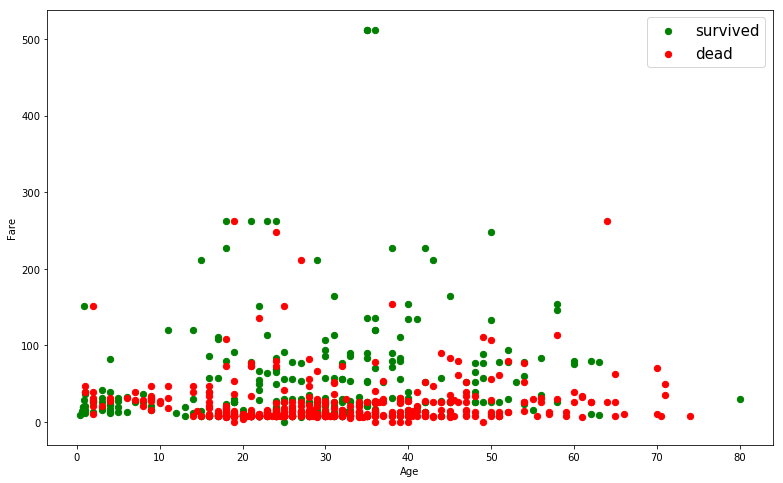

In [41]:
plt.figure(figsize=(13,8))
ax = plt.subplot()
ax.scatter(df[df['Survived']==1]['Age'],df[df['Survived']==1]['Fare'],c='green',s=40)
ax.scatter(df[df['Survived']==0]['Age'],df[df['Survived']==0]['Fare'],c='red',s=40)
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.legend(('survived','dead'),scatterpoints=1,loc='upper right',fontsize=15,)

-> Most of the red bunch(dead) you can see are having lower fare and age ranging from 15-45

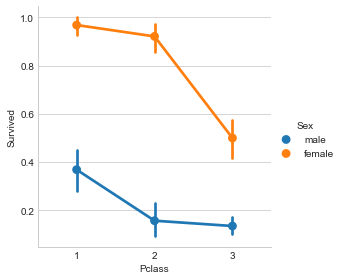

In [64]:
sns.factorplot('Pclass','Survived',hue='Sex',data=df_train)
pd.crosstab([df_train.Sex,df_train.Survived],df_train.Pclass,margins=True).style.background_gradient(cmap='summer_r')

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


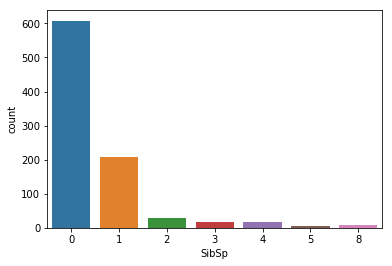

In [42]:
plt.figure()
sns.countplot(x='SibSp',data=df_train)

df_train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

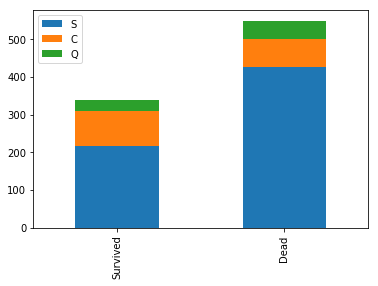

In [53]:
survived_embark = df[df['Survived']==1]['Embarked'].value_counts()
dead_embark = df[df['Survived']==0]['Embarked'].value_counts()
df_t = pd.DataFrame([survived_embark,dead_embark])
df_t.index = ['Survived','Dead']
df_t.plot(kind='bar',stacked=True)

# Data Cleaning

From previous analysis we know that we have to fill missing age data.
Rather than just just filing it by mean, median, we would fill data by the average age of passenger class. Let's see it in graph.

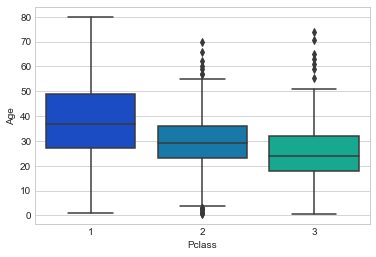

In [102]:
sns.boxplot(x='Pclass',y='Age',data=df_train,palette='winter')

We see that the wealthiest passengers in higher class tend to be older. 

## Replacing Null values

In [75]:
df_train['Initial']=0
for i in df_train:
    df_train['Initial']=df_train.Name.str.extract('([A-Za-z]+)\.')
    
pd.crosstab(df_train.Initial,df_train.Sex).T.style.background_gradient(cmap='summer_r')    

D:\python\a\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  This is separate from the ipykernel package so we can avoid doing imports until


Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [76]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [78]:
df_train.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [ ]:
# FIlling the Nan value
df_train.loc[(data.Age.isnull())&(df_train.Initial=='Mr'),'Age']=33
df_train.loc[(data.Age.isnull())&(df_train.Initial=='Mrs'),'Age']=36
df_train.loc[(data.Age.isnull())&(df_train.Initial=='Master'),'Age']=5
df_train.loc[(data.Age.isnull())&(df_train.Initial=='Miss'),'Age']=22
df_train.loc[(data.Age.isnull())&(df_train.Initial=='Other'),'Age']=46

In [122]:
# def impute_age(cols):
#     Age = cols[0]
#     Pclass = cols[1]
    
#     if pd.isnull(Age):

#         if Pclass == 1:
#             return 37

#         elif Pclass == 2:
#             return 29

#         else:
#             return 24

#     else:
#         return Age

In [123]:
# df_train['Age'] = df_train[['Age','Pclass']].apply(impute_age,axis=1)


In [ ]:
#mostly occuring
df_train['Embarked'].fillna('S',inplace=True)

## Coverting Categorical variable

In [141]:
df_train['Gender'] = df_train['Sex'].map( {'female': 0, 'male': 1} ).astype(int)



In [142]:
embark = pd.get_dummies(df_train['Embarked'],drop_first=True)
df_train = pd.concat([df_train,embark],axis=1)
#axis for shape 

## Dropping unnecessary column and remaining NaN values

In [166]:
df_train.drop(['Cabin','Name','Sex','Embarked','Ticket'],axis=1,inplace=True)

In [168]:
df_train.dropna(inplace=True)

# Check Corelation for redundancy

In [ ]:
sns.heatmap(df_train.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

# Importing Models

In [170]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Split for Training Testing

In [172]:
from sklearn.model_selection import train_test_split

In [174]:
X_train, X_test, y_train, y_test= train_test_split(df_train.drop('Survived',axis=1),
                                                  df_train['Survived'], test_size=0.30,
                                                  random_state= 101)

# Training, Predicting and Evaluation

In [177]:
# Logistic Regression


#Instantiate the model(using dfault paramenter)
logreg= LogisticRegression()

#fit the model with Data
logreg.fit(X_train,y_train)

#Predecting the responce on Testing
prediction= logreg.predict(X_test)

In [197]:
acc_log = (logreg.score(X_train, y_train) * 100)
acc_log

81.701444622792934

In [ ]:
metrics.accuracy_score(prediction,y_test)

In [199]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

             precision    recall  f1-score   support

          0       0.77      0.88      0.82       154
          1       0.79      0.64      0.71       114

avg / total       0.78      0.78      0.77       268



# Comparing Models 

In [198]:
models = pd.DataFrame({
    'Model': ['Logistic Regression'],
    'Score': [acc_log ]})
models

,Model,Score
0,Logistic Regression,81.701445
